# Juntando os Dados Censitários ao Dataset

In [1]:
%matplotlib inline
import geopandas as gpd

In [6]:
setor = gpd.read_file('../01.Dados/Mapas/RJ-SETOR/RJ-SETOR.shp')

In [12]:
setor.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

,ID1,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,geometry
0,400341,330455705060018,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,...,1.77,687.86,607487.37,1162.52,474104.49,468.88,439565.17,993.66,410002.85,"POLYGON ((683.349 7469.178, 683.314 7469.182, ..."
1,400342,330455705060019,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,...,2.06,645.95,443290.44,955.47,359529.36,436.96,323403.61,844.44,280771.01,"POLYGON ((683.309 7469.214, 683.297 7469.202, ..."
2,400343,330455705060020,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,...,1.72,788.46,532814.72,1042.81,437929.47,536.64,468960.56,971.76,425985.79,"POLYGON ((683.298 7469.418, 683.290 7469.421, ..."
3,400344,330455705060021,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,...,2.57,635.00,587850.00,1018.65,551834.99,323.89,379860.88,1008.94,493116.72,"POLYGON ((683.478 7469.289, 683.459 7469.288, ..."
4,400347,330455705060024,URBANO,330455705003,Santo Cristo,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,...,2.49,568.02,173698.43,679.01,131792.80,378.96,177655.16,645.64,130200.18,"POLYGON ((683.852 7465.622, 683.843 7465.627, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10499,411867,330455705390216,URBANO,330455705043,Cordovil,330455705,RIO DE JANEIRO,330455705,VIGÁRIO GERAL,3304557,...,2.40,828.53,316518.96,871.85,295159.34,585.66,347681.59,825.76,291738.30,"POLYGON ((675.153 7475.583, 675.109 7475.622, ..."
10500,411868,330455705390217,URBANO,330455705043,Cordovil,330455705,RIO DE JANEIRO,330455705,VIGÁRIO GERAL,3304557,...,2.03,570.84,261676.78,765.76,201029.25,550.40,412755.16,827.11,391277.31,"POLYGON ((675.157 7475.473, 675.167 7475.468, ..."
10501,411869,330455705390218,URBANO,330455705045,Vigário Geral,330455705,RIO DE JANEIRO,330455705,VIGÁRIO GERAL,3304557,...,2.38,1072.34,1326129.14,1367.78,1286997.02,684.90,846483.97,1142.61,889406.08,"POLYGON ((673.481 7476.625, 673.183 7476.498, ..."
10502,411870,330455705390219,URBANO,330455705045,Vigário Geral,330455705,RIO DE JANEIRO,330455705,VIGÁRIO GERAL,3304557,...,2.18,1238.66,1277033.16,1343.83,1243817.44,762.23,868698.73,1121.15,875383.10,"POLYGON ((672.891 7476.203, 672.865 7476.271, ..."


In [13]:
geo_dados = gpd.read_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

<AxesSubplot:>

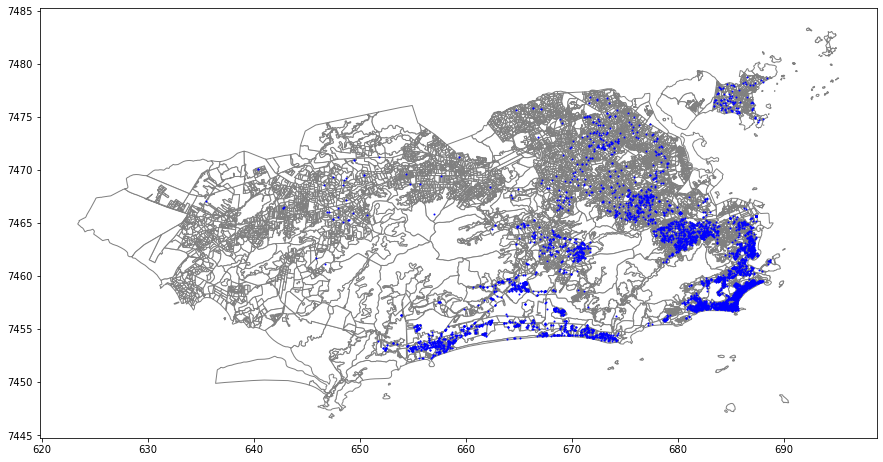

In [14]:
base = setor.plot(color='white', edgecolor='grey', figsize=(15,8))
geo_dados.plot(ax = base, color='blue', markersize=1)

In [15]:
geo_dados = gpd.sjoin(geo_dados, setor, how='left', op='within')

C:\Users\LUIS~1.MOT\AppData\Local\Temp/ipykernel_24148/2887098156.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["UTM_Zone_23_Southern_Hemisphere",GEOGCS["G ...
Right CRS: PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["D_Unk ...

  geo_dados = gpd.sjoin(geo_dados, setor, how='left', op='within')


In [19]:
~geo_dados.index.duplicated(keep='first')

array([ True,  True,  True, ...,  True,  True,  True])

In [20]:
geo_dados = geo_dados[~geo_dados.index.duplicated(keep='first')]

In [21]:
geo_dados.shape

(4513, 64)

In [22]:
geo_dados.to_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

C:\Users\LUIS~1.MOT\AppData\Local\Temp/ipykernel_24148/1839450108.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geo_dados.to_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')
